#We're going to be using LSTM (long short term memory) to predict stocks, LSTM is an artificial recurrent neural network (RNN) architecture

In [0]:
#Imports
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

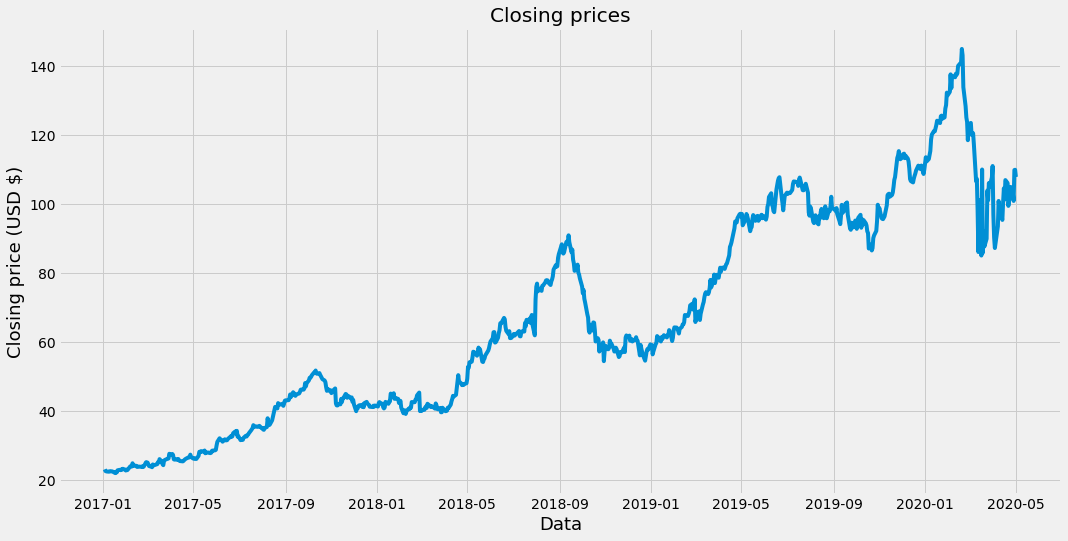

In [0]:
#Get the stock quote, from the previous number of days/years and show the data, df is a "data frame"
df = web.DataReader('APPF', data_source='yahoo', start='2017-01-01', end= '2020-05-01')#Showing the closing prices in a graph
plt.figure(figsize=(16,8))
plt.title('Closing prices')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Closing price (USD $)', fontsize = 18)
plt.show()

In [0]:
#Create a new datafrom with only the 'Close' column
data = df.filter(['Close'])
#Convert the datafram to a numpy array
dataset = data.values
#We want to train the data on about 80% of the rows so store that number is training_data_len
training_data_len = math.ceil( len(dataset) * .8)
#Now lets scale the data for preprocessing transformations. Doing this to the input data before it is presented to a neural network
scaler = MinMaxScaler(feature_range=(0,1)) #value can be between 0 and 1 inclusive
scaled_data = scaler.fit_transform(dataset)
#printing to show the values are all between [0,1]
scaled_data

array([[0.00894309],
       [0.00487805],
       [0.00406504],
       [0.00365854],
       [0.00325203],
       [0.00447155],
       [0.00447155],
       [0.00406504],
       [0.00406504],
       [0.        ],
       [0.00284553],
       [0.00162602],
       [0.00650407],
       [0.00772358],
       [0.00691057],
       [0.0085366 ],
       [0.00813008],
       [0.0101626 ],
       [0.00813008],
       [0.00609756],
       [0.00813008],
       [0.00691057],
       [0.00894309],
       [0.01585367],
       [0.01626016],
       [0.01544715],
       [0.02317074],
       [0.01707317],
       [0.01747967],
       [0.01707317],
       [0.01463416],
       [0.01463416],
       [0.01544715],
       [0.01463416],
       [0.01585367],
       [0.01422764],
       [0.01544715],
       [0.02560975],
       [0.02398375],
       [0.02479676],
       [0.02113822],
       [0.01666668],
       [0.01504065],
       [0.01382115],
       [0.0203252 ],
       [0.01788619],
       [0.0186992 ],
       [0.020

In [0]:
#Here we are creating the training data set
#Create scaled training set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = [] #independent variables
y_train = [] #dependent
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) #one pass through adds 60 values, from index 0 to 59
  y_train.append(train_data[i, 0])      #one pass through adds 61st value, at index 60

In [0]:
#Convert training datasets to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
#Reshape the data so we have 3 dimensional data which the LSTM model needs, currently our data is only w dimensional 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
#Now build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1))) #50 neurons with input sahpe being number of time steps
model.add(LSTM(50, return_sequences=False)) #False because no more LSTM layers for our models architecture
model.add(Dense(25)) #add densely connected layer with 25 neurons
model.add(Dense(1))
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') #adam optimizer and loss function will measure how well it did on training

In [0]:
#Train the model, this takes about 60 seconds give or take
model.fit(x_train,y_train, batch_size=1, epochs=1)

Epoch 1/1
611/611 [==============================] - 25s 41ms/step - loss: 0.0022


In [0]:
#Create the testing data set
#Create new array contraining scaled values 
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :] #holds all values we want model to predict
for i in range(60, len(test_data)):     #creating x_test set
  x_test.append(test_data[i-60:i, 0])

In [0]:
#Convert the data to a numpy array, again, so we can use it in the LSTM model
x_test = np.array(x_test)
#Reshape data again so it is 3D for the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) #gave # of cells (rows), # time steps (columns) and # number of features which is 1
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscaling the values and we want the predictions to contain teh same values as y_test data set

In [0]:
#Evaluate the model by getting the root mean squared error (RMSE), lower values of RMSE indicates a better fit
rmse = np.sqrt(np.mean((predictions - y_test) **2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


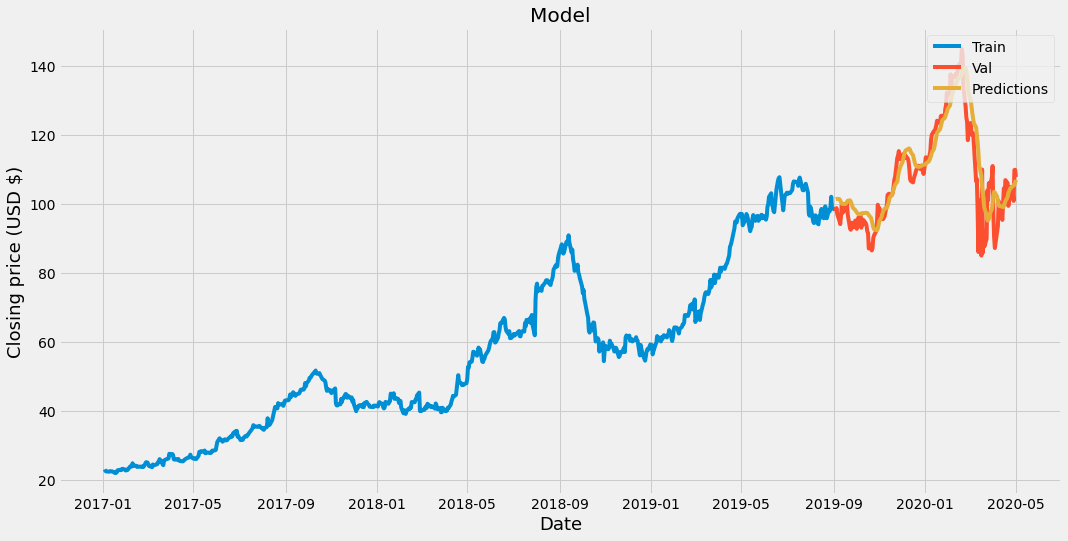

In [0]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price (USD $)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])                       #actual prices to compare to our trained data
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()
#blue is the data model is trained on
#red color is actual
#yellow is what our model predicted

In [0]:
#This is all of our code, if we change the name of the stock in the first code block we are able to get the graph for each of those, we made a small slideshow so we don't 
#have to compile the code each time to show you guys what our paper is also about